In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Se buscarán los missing values en nuestra train data
missing_value = train.isnull().sum()
number_of_cols = missing_value[missing_value>1]
print(number_of_cols)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Text(0.5, 1.0, 'Precio de las casas vs año')

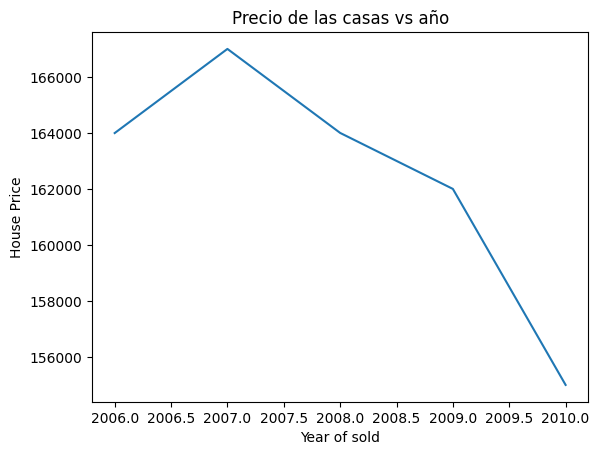

In [ ]:
#Grafica de análisis
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of sold')
plt.ylabel('House Price')
plt.title('Precio de las casas vs año')

Podemos ver que el costo de las casas conforme aumentan los años ha ido disminuyendo a partir del año 2007.

In [ ]:
#Se eliminan las filas que tengan valores nulos en la columna SalePrice
train.dropna(axis=0, subset=['SalePrice'], inplace=True)

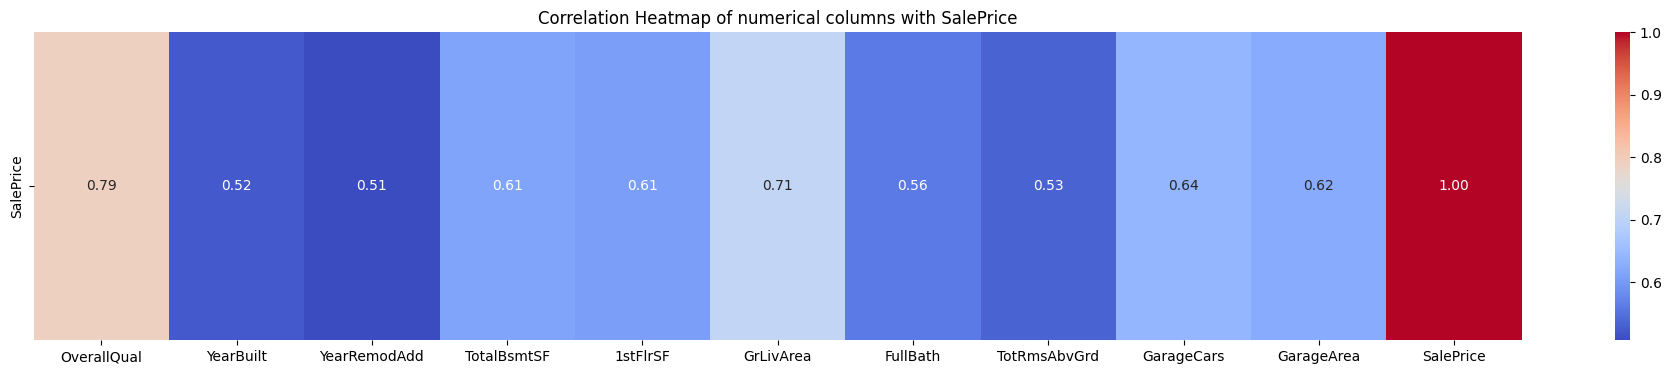

In [ ]:
#Se calcula la correlación

correlation_matrix = train.corr()

# Selecciona las columnas con alta correlación con 'SalePrice'
high_corr_columns = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].index

# Plotea el heatmap de correlación
plt.figure(figsize=(24, 4))
sns.heatmap(correlation_matrix.loc[['SalePrice'], high_corr_columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of numerical columns with SalePrice')
plt.show()

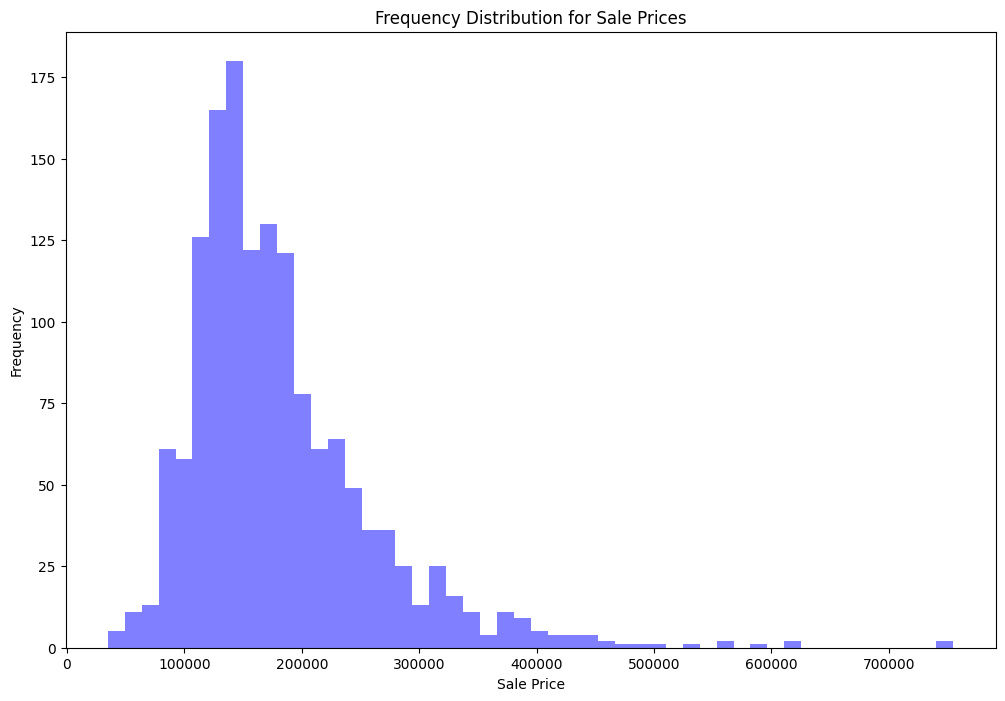

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(train['SalePrice'], bins=50, color='blue', alpha=0.5)
plt.title('Frequency Distribution for Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

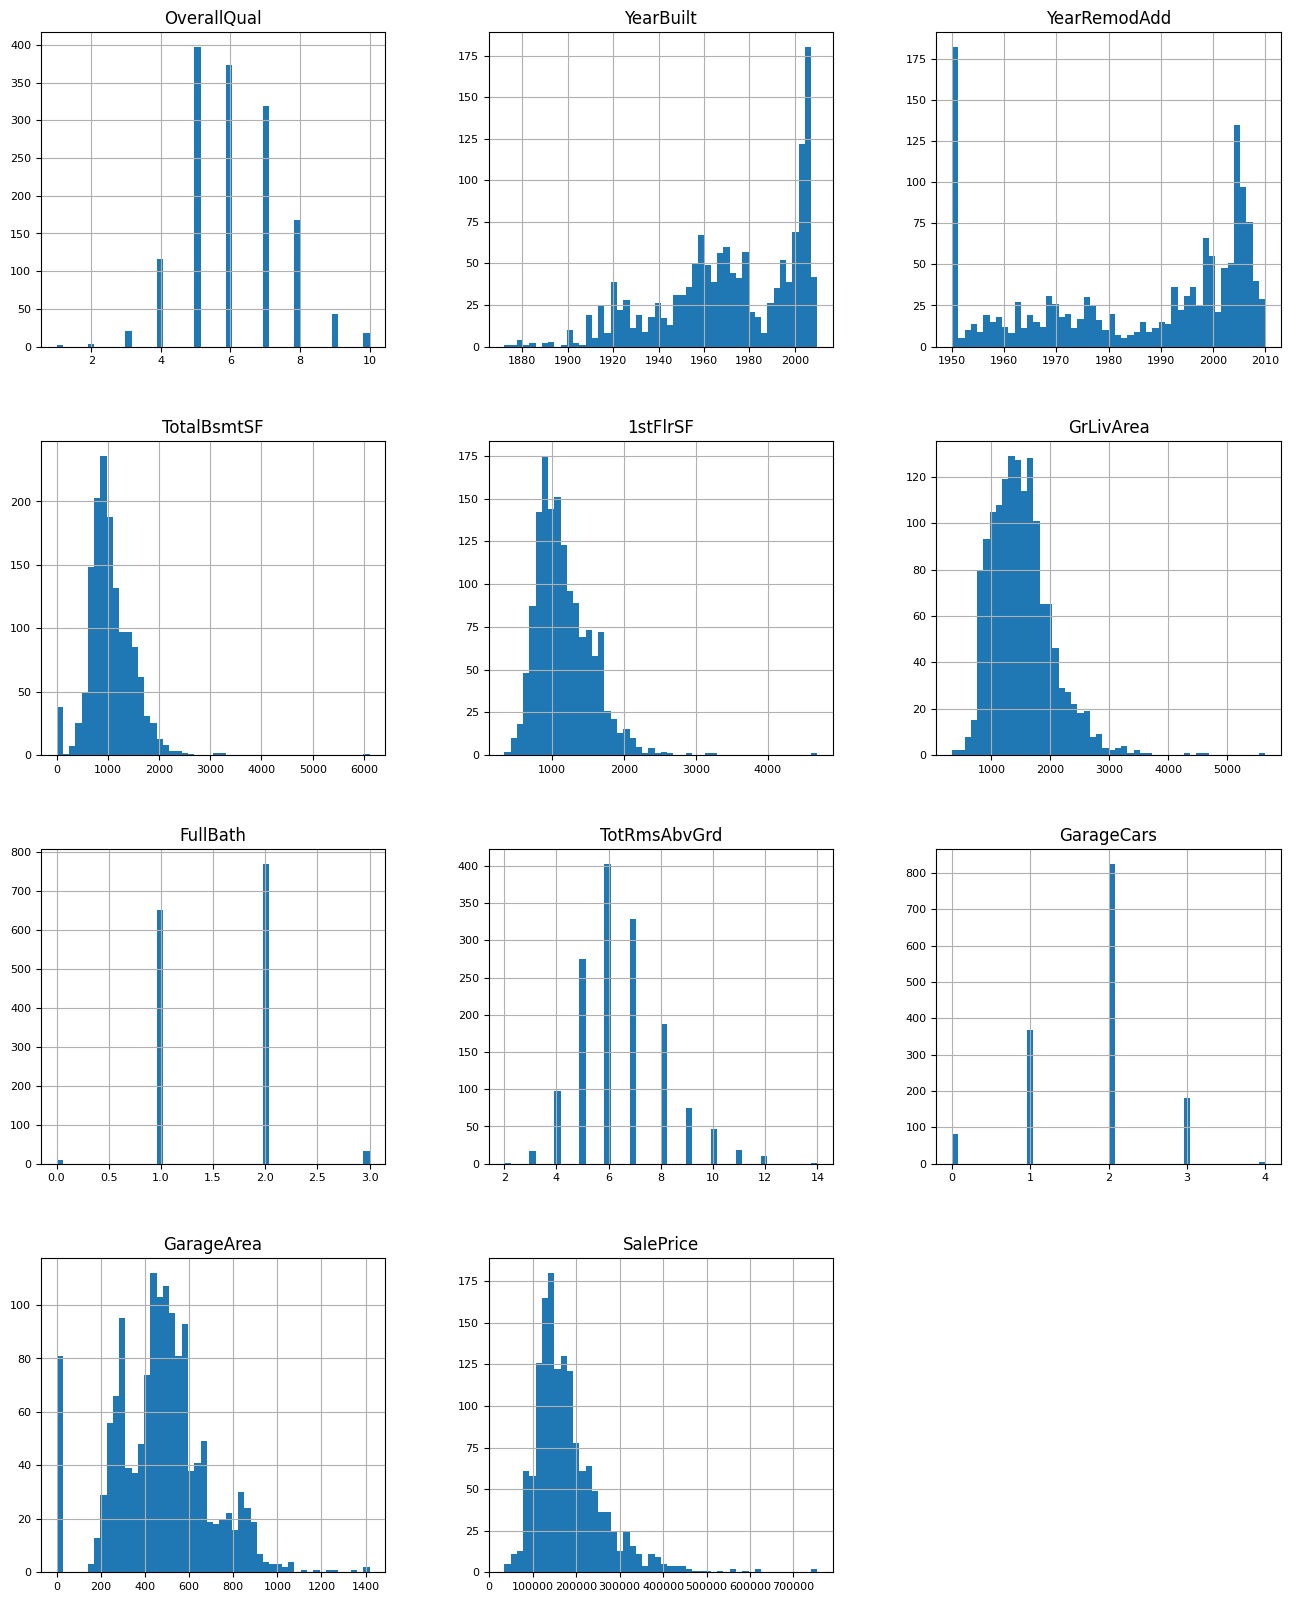

In [ ]:
# Histogramas
train[high_corr_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Display the histograms
plt.show()

In [ ]:
#Asignamos las variables para nuestro modelo
X = train.drop(['Id', 'SalePrice'], axis=1).select_dtypes(exclude=['object'])
y = train['SalePrice']

In [ ]:
#Utilizamos el 20% como test y el 80% como training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
#Se utiliza el modelo descenso de gradiente con los datos de entrenamiento
modelo = XGBRegressor()
modelo.fit(X_train, y_train, )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Se calcula MSE, aunque este valor puede depender de la escala de nuestros datos
p = modelo.predict(X_test)

mse = mean_squared_error(y_test, p)
print(mse)

905857812.2694533


In [ ]:
#Se calcula el MAE, de acuerdo al costo de nuestras casas el mae obtenido se considera bueno
mae = mean_absolute_error(y_test, p)
print(mae)

17590.861542166094


In [ ]:
# Se calcula el coeficiente de Determinación que indica la proporción de la
#variabilidad en la variable dependiente que es predecible a partir de las
#variables independientes. Entre el valor sea más cercano a 1 nuestra predicción
#es mejor por lo que .85 es una buena predicción
r2 = r2_score(y_test, p)
print(r2)

0.853411933518567


In [ ]:
#Finalmente se calculan las predicciones para el archivo de test y se dan los
# y se crea un csv con los resultados
test_predictions = modelo.predict(test.drop('Id', axis=1).select_dtypes(exclude=['object']))

predictions = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions})

predictions.to_csv('predictions.csv', index=False)
predictions

,Id,SalePrice
0,1461,130587.296875
1,1462,162695.937500
2,1463,174165.062500
3,1464,178855.765625
4,1465,198461.546875
...,...,...
1454,2915,80621.125000
1455,2916,80992.664062
1456,2917,180714.578125
1457,2918,108777.734375
